# Import the necessary packages

In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import re

# Imread the csv information

In [2]:
def read_csv_file(file_path):
    servoing_informations = []
    counter = 0
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # skip header

        for row in csv_reader:
            if counter == 0:
                goal_informations = row
            else:
                servoing_informations.append(row)
            counter += 1
    return goal_informations, servoing_informations

In [3]:
goal_informations, servoing_informations= read_csv_file("servoing_csv/keypoints_servoing (1).csv")

FileNotFoundError: [Errno 2] No such file or directory: 'servoing_csv/keypoints_servoing (1).csv'

# Get the time values

In [ ]:
interference_neural_networks = [] # only nn
time_for_keypoint_extraction = [] # keypoint extraction function
time_for_servoing_loop = [] # hole servoing loop
time_for_picture = [] # time for taking a picture

for i in range(len(servoing_informations)):
    time_for_servoing_loop.append(float(servoing_informations[i][2]))
    interference_neural_networks.append(float(servoing_informations[i][3]))
    time_for_keypoint_extraction.append(float(servoing_informations[i][4]))
    time_for_picture.append(float(servoing_informations[i][6]))


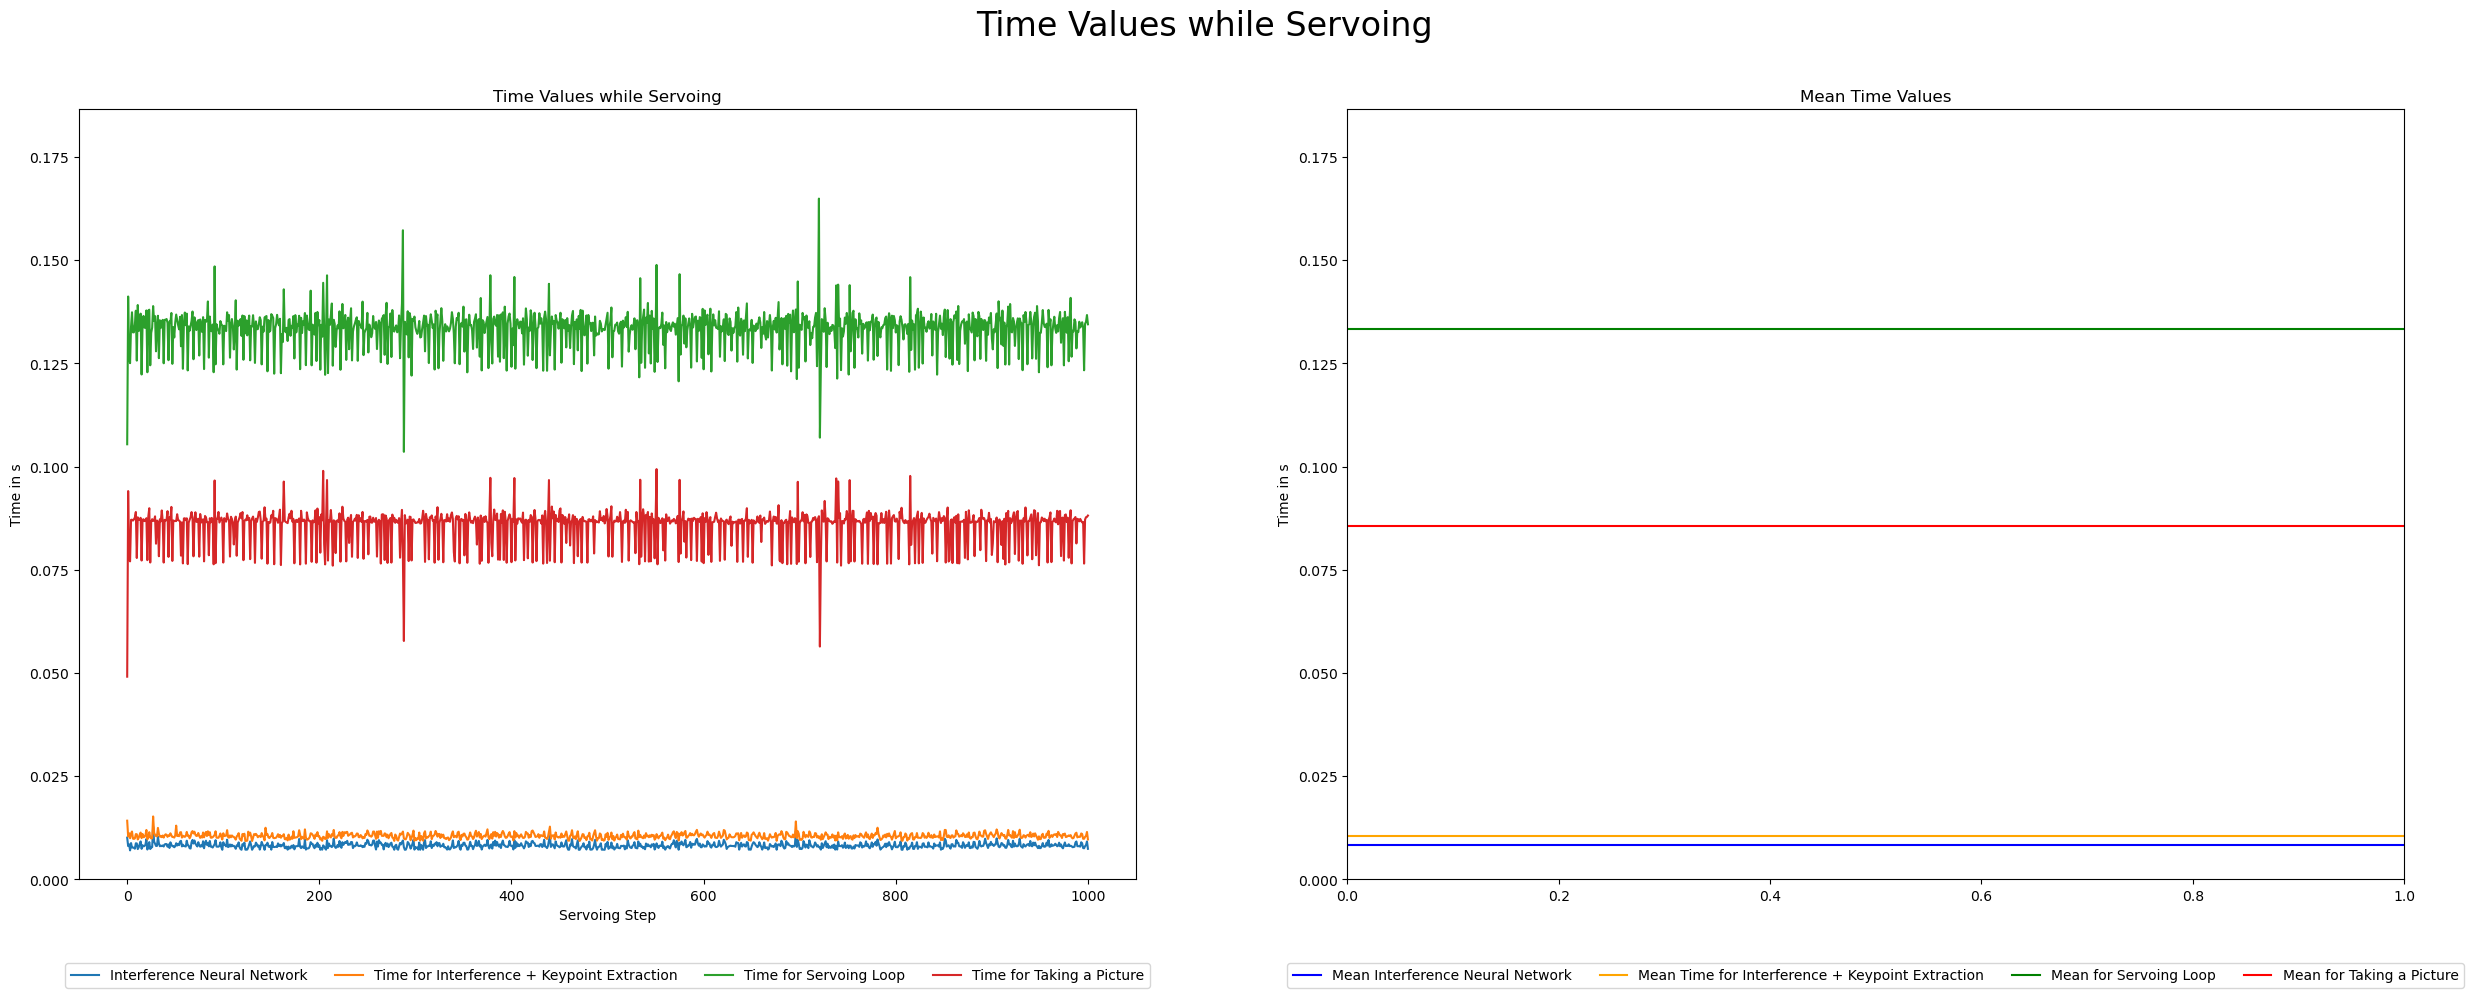

In [ ]:
# Generate random data for mean values (example)
mean_interference_neural_networks = np.array(interference_neural_networks).mean()
mean_time_for_keypoint_extraction = np.array(time_for_keypoint_extraction).mean()
mean_time_for_servoing_loop = np.array(time_for_servoing_loop).mean()
mean_time_for_picture = np.array(time_for_picture).mean()

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

# Plot the upper code on the left subplot (ax1)
ax1.plot(interference_neural_networks, label="Interference Neural Network")
ax1.plot(time_for_keypoint_extraction, label="Time for Interference + Keypoint Extraction")
ax1.plot(time_for_servoing_loop, label="Time for Servoing Loop")
ax1.plot(time_for_picture, label="Time for Taking a Picture")
ax1.set_xlabel("Servoing Step")
ax1.set_ylabel("Time in s")
legend = ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=5)
ax1.set_ylim(0, max(mean_interference_neural_networks, mean_time_for_keypoint_extraction, mean_time_for_servoing_loop)*1.4)
ax1.title.set_text('Time Values while Servoing')

# Plot the mean values on the right subplot (ax2)
ax2.axhline(y=mean_interference_neural_networks, color="blue",label="Mean Interference Neural Network")
ax2.axhline(y=mean_time_for_keypoint_extraction, color="orange",label="Mean Time for Interference + Keypoint Extraction")
ax2.axhline(y=mean_time_for_servoing_loop, color="green",label="Mean for Servoing Loop")
ax2.axhline(y=mean_time_for_picture, color="red",label="Mean for Taking a Picture")
ax2.set_ylabel("Time in s")
legend = ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=5)
ax2.set_ylim(0, max(mean_interference_neural_networks, mean_time_for_keypoint_extraction, mean_time_for_servoing_loop)*1.4)
ax2.title.set_text('Mean Time Values')

# Display the plot
plt.suptitle('Time Values while Servoing', fontsize=24)
plt.show()


# Get the Progression of the Keypoints while Servoing

In [ ]:
goal_featurepoints = goal_informations[0]
goal_featurepoints = eval(goal_featurepoints)

In [ ]:
# make a list with 64 lists in it
pixel_error = []
for i in range(len(goal_featurepoints)):
    pixel_error.append([])

In [ ]:
for row in servoing_informations:
    featurepoints = row[0]
    featurepoints = eval(featurepoints)

    for i in range(len(featurepoints)):
        pixel_error_x = goal_featurepoints[i][0]-featurepoints[i][0]
        pixel_error_y = goal_featurepoints[i][1]-featurepoints[i][1]
        pixel_error[i].append([pixel_error_x, pixel_error_y])

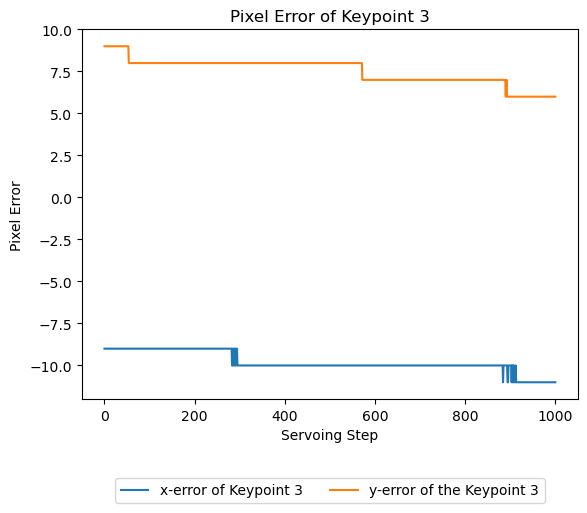

In [ ]:
keypoint_number = 3 # starts with 0

plt.plot(pixel_error[keypoint_number])
plt.xlabel('Servoing Step')
plt.ylabel('Pixel Error')
plt.title('Pixel Error of Keypoint ' + str(keypoint_number))
plt.legend(['x-error of Keypoint '+str(keypoint_number), 'y-error of the Keypoint '+str(keypoint_number)], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.show()



# Plot the Velocity of the Endeffector while Servoing

In [ ]:
velocity = [] # hole servoing loop

for i in range(len(servoing_informations)):
    string = servoing_informations[i][5]
    clean_string = re.sub(r'[^\d.eE+-]+', ' ', string)
    values = re.findall(r"[-+]?\d+(?:\.\d+)?(?:[eE][-+]?\d+)?", clean_string)
    float_values = [float(value) for value in values]
    velocity.append(float_values)

velocity = list(zip(*velocity))

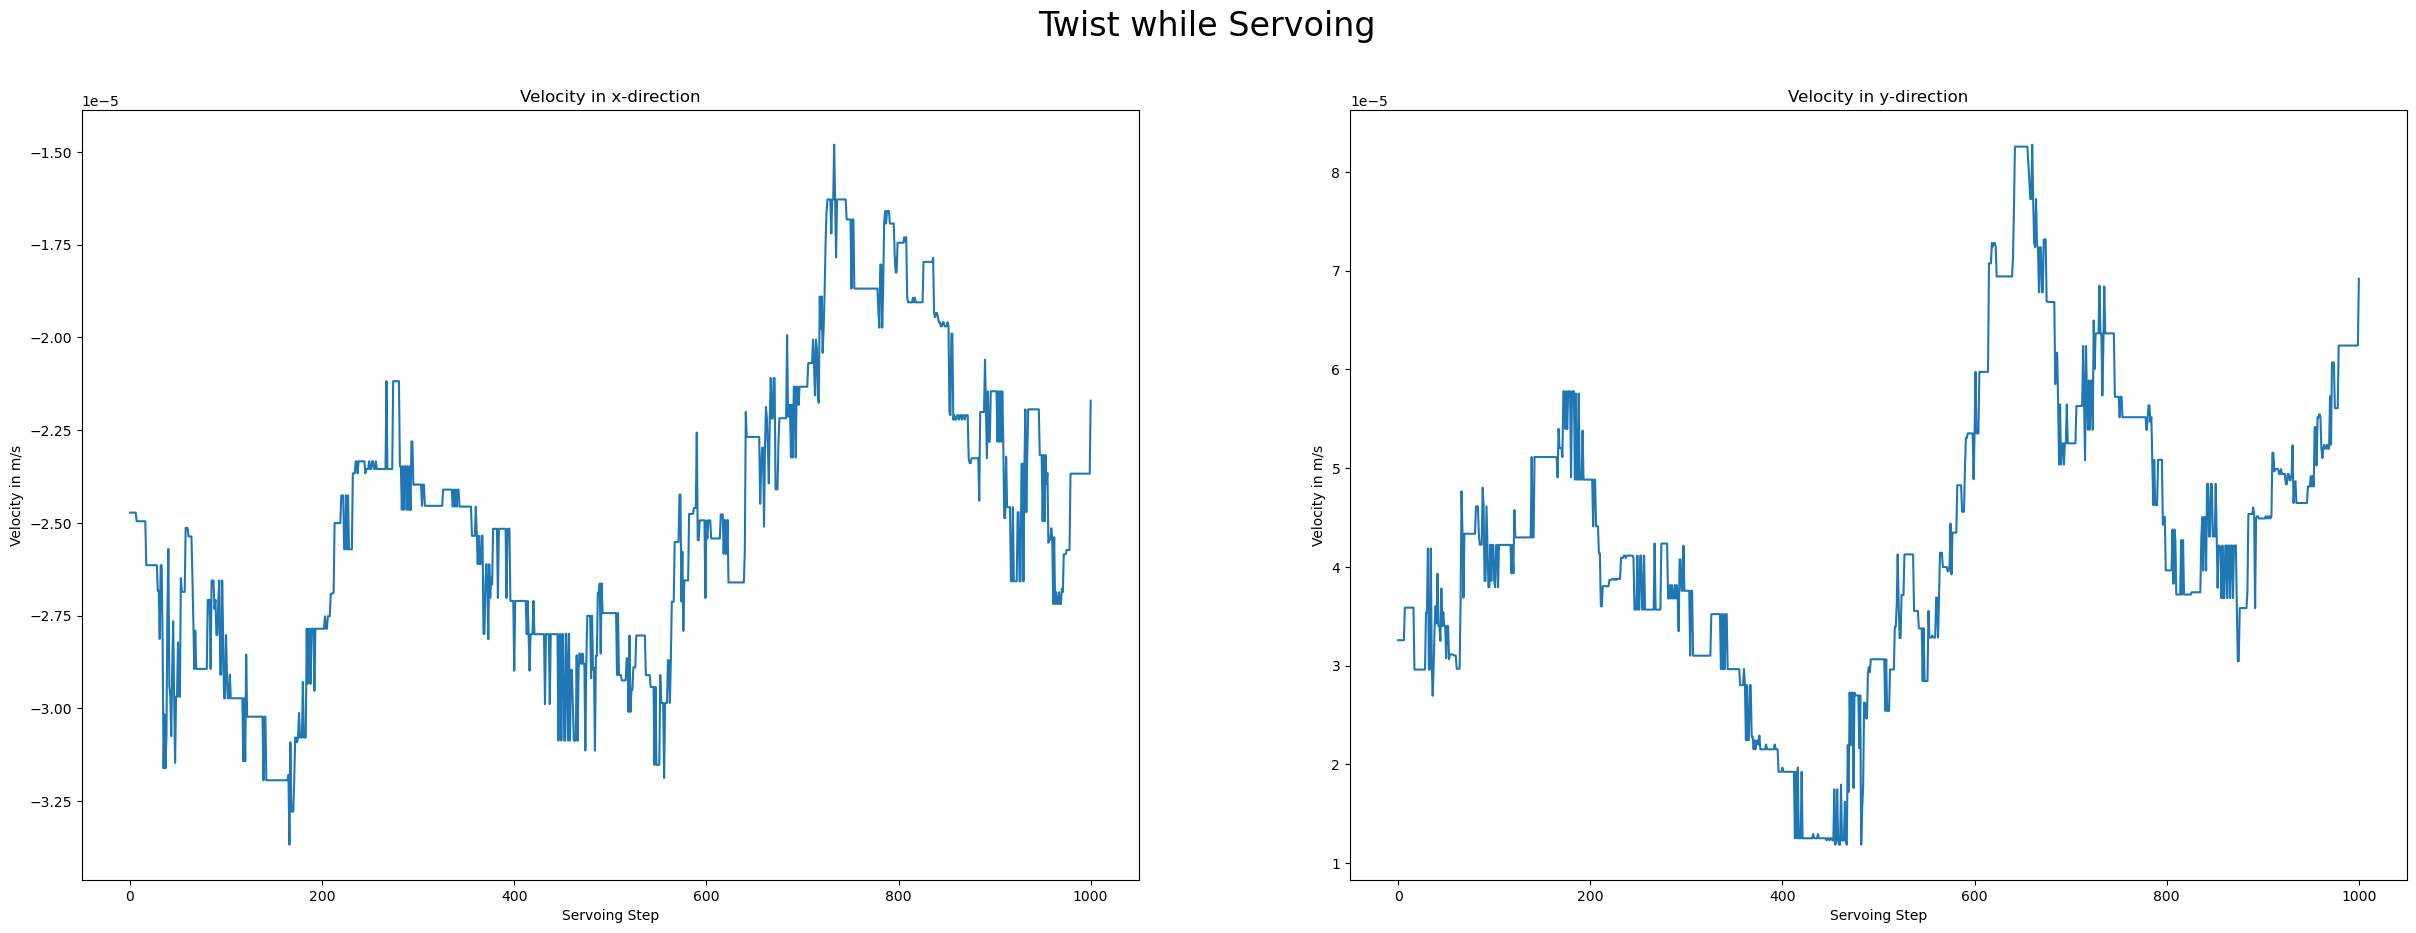

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

ax1.plot(velocity[0])
ax1.set_title("Velocity in x-direction")
ax1.set_xlabel("Servoing Step")
ax1.set_ylabel("Velocity in m/s")


ax2.plot(velocity[1])
ax2.set_title("Velocity in y-direction")
ax2.set_xlabel("Servoing Step")
ax2.set_ylabel("Velocity in m/s")

plt.suptitle('Twist while Servoing', fontsize=24)
plt.show()

# 